In [1]:
#support vector machine
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import svm
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

In [28]:
df = sns.load_dataset('iris')
df.head()


sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [29]:
col = ['petal_length', 'petal_width', 'species']
df.loc[:, col].head()


petal_length  petal_width species
0           1.4          0.2  setosa
1           1.4          0.2  setosa
2           1.3          0.2  setosa
3           1.5          0.2  setosa
4           1.4          0.2  setosa

In [30]:
col = ['petal_length', 'petal_width']
X = df[col]



In [32]:
species_to_num = {'setosa': 0,
                  'versicolor': 1,
                  'virginica': 2}
def d(niz):
    return niz + "aaaa"
df["tmp"] = df.loc[:, "species"].map(species_to_num) 
y = df[["tmp"]]


tmp
0      0
1      0
2      0
3      0
4      0
..   ...
145    2
146    2
147    2
148    2
149    2

[150 rows x 1 columns]

In [35]:
from sklearn import svm
C = 1.0
clf = svm.SVC(kernel="linear", C=C)


In [36]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8, 
                                                    random_state=0)

In [55]:
scaler = preprocessing.StandardScaler()
X_std_train = scaler.fit_transform(X_train)
C = 1
clf = svm.SVC(kernel="linear", C=C)
clf.fit(X_std_train, y_train)


C:\Users\informatika\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, kernel='linear')

In [58]:
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix
score = cross_val_score(clf, X_std_train, y_train, cv=10, scoring='accuracy')
print(score.mean())
print(score.std())


0.95
0.055277079839256664


C:\Users\informatika\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\informatika\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\informatika\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

In [57]:
y_train_pred = cross_val_predict(clf, X_std_train, y_train, cv=3)
cm = confusion_matrix(y_train, y_train_pred)
cm

C:\Users\informatika\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\informatika\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\informatika\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

array([[39,  0,  0],
       [ 0, 34,  3],
       [ 0,  3, 41]], dtype=int64)

In [63]:
print(precision_score(y_train, y_train_pred,average='weighted' ))
X_std_test = scaler.transform(X_test)
y_test_pred = cross_val_predict(clf, X_std_test, y_test, cv=3)
confusion_matrix(y_test, y_test_pred)
precision_score(y_test,y_test_pred, average="weighted")


0.95


C:\Users\informatika\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\informatika\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\informatika\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

0.9422222222222222

C:\Users\informatika\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\informatika\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\informatika\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

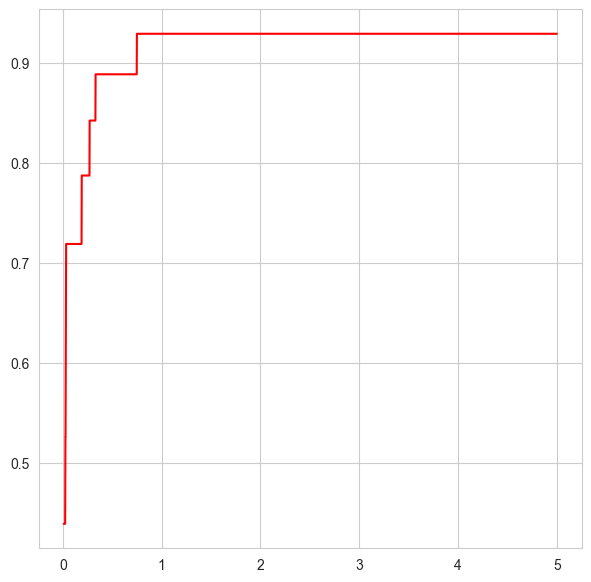

In [80]:
from sklearn.metrics import f1_score
a = np.arange(0.01,5,0.001)
pr = np.array([])
for c in a:
    clf = svm.SVC(kernel="linear", C=c)
    clf.fit(X_std_train, y_train)
    y_test_pred = cross_val_predict(clf, X_std_test, y_test, cv=3)
    score = f1_score(y_test,y_test_pred, average= "weighted" )
    pr = np.concatenate((pr, np.array([score])), axis=0)
    
plt.figure(figsize=(7,7))
plt.plot(a, pr, c="red")

In [92]:
#polynommial kernel
clf = svm.SVC(kernel="poly", degree=10, C=1.0, gamma="auto")
clf.fit(X_std_train, y_train)
y_test_pred_poly = cross_val_predict(clf, X_std_test, y_test, cv=3)
print(confusion_matrix(y_test,y_test_pred_poly))
f1_score(y_test, y_test_pred_poly, average="weighted")
cross_val_score(clf, X_std_train, y_train, cv=10, scoring="accuracy").mean()

[[10  0  1]
 [ 0 13  0]
 [ 3  3  0]]


C:\Users\informatika\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\informatika\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\informatika\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

0.7833333333333334

In [93]:
y_test_pred_poly = cross_val_predict(clf, X_std_test, y_test, cv=3)
confusion_matrix(y_test, y_test_pred_poly)

C:\Users\informatika\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\informatika\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\informatika\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

array([[10,  0,  1],
       [ 0, 13,  0],
       [ 3,  3,  0]], dtype=int64)

In [96]:
#gaussion kernell rbf or radial basis functions
clf = svm.SVC(kernel="rbf", gamma=0.7, C=1.0)
clf.fit(X_std_train, y_train)

C:\Users\informatika\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(gamma=0.7)

In [103]:
y_train_pred_rbf = cross_val_predict(clf, X_std_train, y_train, cv=3)
confusion_matrix(y_train, y_train_pred_rbf)
cross_val_score(clf, X_std_train, y_train, cv=10).std()
f1_score(y_train, y_train_pred_rbf, average="weighted")

C:\Users\informatika\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\informatika\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\informatika\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

0.9583716475095786

In [158]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
pipeline = Pipeline([('clf', svm.SVC(kernel='linear', C=1, gamma=0.1))]) 

params = {'clf__C':(0.1, 0.5, 1, 2, 5, 10, 20), 
          'clf__gamma':(0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1),
          'clf__kernel':("linear", "rbf")} 

svm_grid_rbf = GridSearchCV(pipeline, params, n_jobs=-1,
                            cv=3, verbose=1, scoring='accuracy') 

svm_grid_rbf.fit(X_train, y_train) 

svm_grid_rbf.best_estimator_.get_params()
clf1 = svm.SVC(kernel="linear", C=0.5, gamma=0.001)
clf1.fit(X_train, y_train)
from sklearn.model_selection import cross_val_score
cross_val_score(clf1, X_train, y_train, cv=3, scoring="accuracy").mean()

Fitting 3 folds for each of 98 candidates, totalling 294 fits


C:\Users\informatika\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\informatika\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\informatika\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

0.9583333333333334